## Snowpit Layer Information - RQ1

 Create tables of value and qty for the following properties of layers in a group of snow pits
 

 **Done**
* grainFormPrimary
* grainFormSecondary
* hardness

**Possible**
* depthTop
* thickness
* wetness

Snow Pit Group 1: 200 snow pits from Montana

folder: snowpits_200_MT


In [44]:
# Import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from xml.dom import minidom
from Layer import Layer

# Define the path to snowpits folder
folder_path = "snowpits_200_MT" # The latest 200 snow pits from MT

In [54]:
# iterate through caaml files and create list of layer objects
# layerslist is a list of layer objects for all the layers in all the caaml files

#caaml_parser in process

layersList = [] # Initialize list of layer objects

# Create a list of all CAAML files in the folder
caaml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')] # List of all CAAML files in the folder

# Iterate through each file
for file in caaml_files:
        
        # Parse the file
        file_path = folder_path + '/' + file
        doc = minidom.parse(file_path)
        root = doc.documentElement

        # Get all Layer nodes
        layers = root.getElementsByTagName('caaml:Layer')

        # Process each layer
        for layer in layers:
            # Initialize layer object parameters
            depthTop = None
            thickness = None
            grainFormPrimary = None
            grainFormSecondary = None
            hardness = None
            wetness = None

            for node in layer.childNodes:
                if node.localName == 'depthTop':
                    depthTop = node.firstChild.nodeValue                
                if node.localName == 'thickness':
                    thickness = node.firstChild.nodeValue
                if node.localName == 'grainFormPrimary':
                    grainFormPrimary = node.firstChild.nodeValue
                if node.localName == 'grainFormSecondary':
                    grainFormSecondary = node.firstChild.nodeValue
                if node.localName == 'hardness':
                    hardness = node.firstChild.nodeValue
                if node.localName == 'wetness':
                    wetness = node.firstChild.nodeValue

            # Create layer object
            layer_i = Layer(depthTop,thickness,grainFormPrimary,grainFormSecondary,hardness,wetness)
            layersList.append(layer_i)
    

In [58]:
layer1=layersList[1]
print(layer1)
#print(layer1.get_grainFormPrimaryClass())
#print(layer1.get_grainFormPrimarySubClass())    

Layer: 8, 39, DFbk, None, F+, None


In [56]:
# Create a dataframe from the list of layer objects
df = pd.DataFrame([vars(layer) for layer in layersList]) 
print(df)

     depthTop thickness grainFormPrimary grainFormSecondary hardness wetness
0           0         8             DFbk               None        F    None
1           8        39             DFbk               None       F+    None
2          47         1             MFcr               None       1F    None
3          48        20             FCxr               None       4F    None
4          23      None             None               None     None    None
...       ...       ...              ...                ...      ...     ...
1823       43         1               RG               None       1F    None
1824       44        19               RG               None      1F+    None
1825       63        14               FC               None      4F+    None
1826       29      None             None               None     None    None
1827       63      None             None               None     None    None

[1828 rows x 6 columns]



Primary Grain Form Distribution:
Grain Form  Count  Percentage
        FC    224        17.4
        RG    159        12.3
        DF    138        10.7
      MFcr    122         9.5
        PP    119         9.2
      FCxr    116         9.0
      RGxf     63         4.9
      RGwp     46         3.6
      FCso     44         3.4
      IFrc     37         2.9
        SH     29         2.2
      RGsr     29         2.2
      DFbk     27         2.1
      FCsf     20         1.6
      DFdc     18         1.4
      PPgp     17         1.3
        IF     11         0.9
        DH      9         0.7
      MFcl      9         0.7
      RGlr      8         0.6
        MF      7         0.5
      SHsu      6         0.5
      DHxr      5         0.4
      PPrm      5         0.4
      IFsc      4         0.3
      IFil      4         0.3
      IFbi      3         0.2
      MFpc      3         0.2
      PPsd      3         0.2
      SHxr      2         0.2
      DHla      1         0.1
      

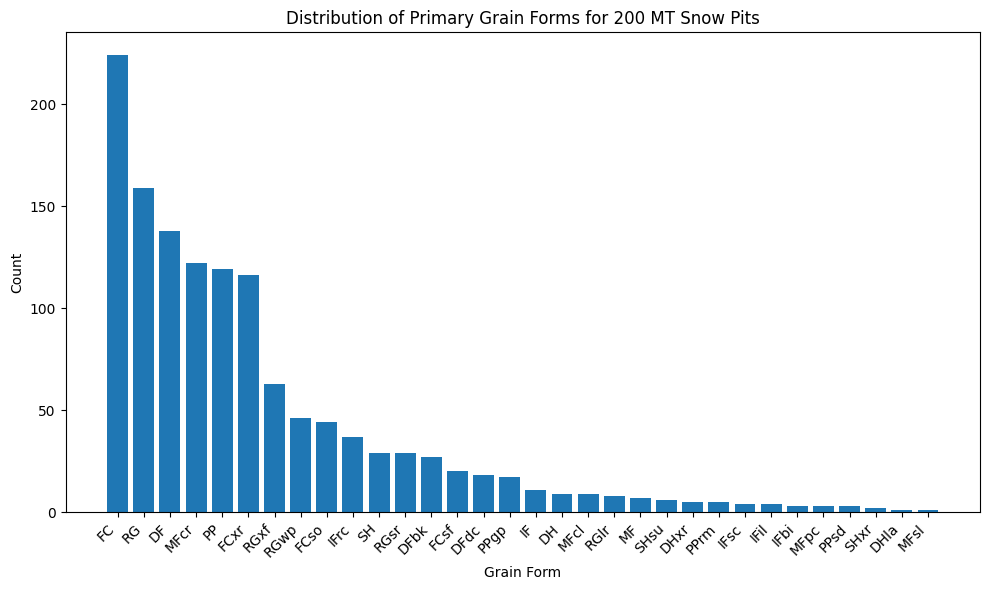

In [31]:
# Create a value counts table for grainFormPrimary
grain_form_table = df['grainFormPrimary'].value_counts().reset_index()
grain_form_table.columns = ['Grain Form', 'Count']

# Add percentage column
grain_form_table['Percentage'] = (grain_form_table['Count'] / grain_form_table['Count'].sum() * 100).round(1)

# Display the table
print("\nPrimary Grain Form Distribution:")
print(grain_form_table.to_string(index=False))

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grain_form_table['Grain Form'], grain_form_table['Count'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Primary Grain Forms for 200 MT Snow Pits')
plt.xlabel('Grain Form')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Hardness Distribution:
Hardness  Count  Percentage
      4F    241        18.3
      1F    235        17.9
       F    218        16.6
       P    141        10.7
     1F-     77         5.9
     1F+     76         5.8
     4F+     70         5.3
      F+     57         4.3
     4F-     49         3.7
      P+     44         3.3
      F-     35         2.7
      P-     35         2.7
       K     27         2.1
      K-      5         0.4
       I      4         0.3


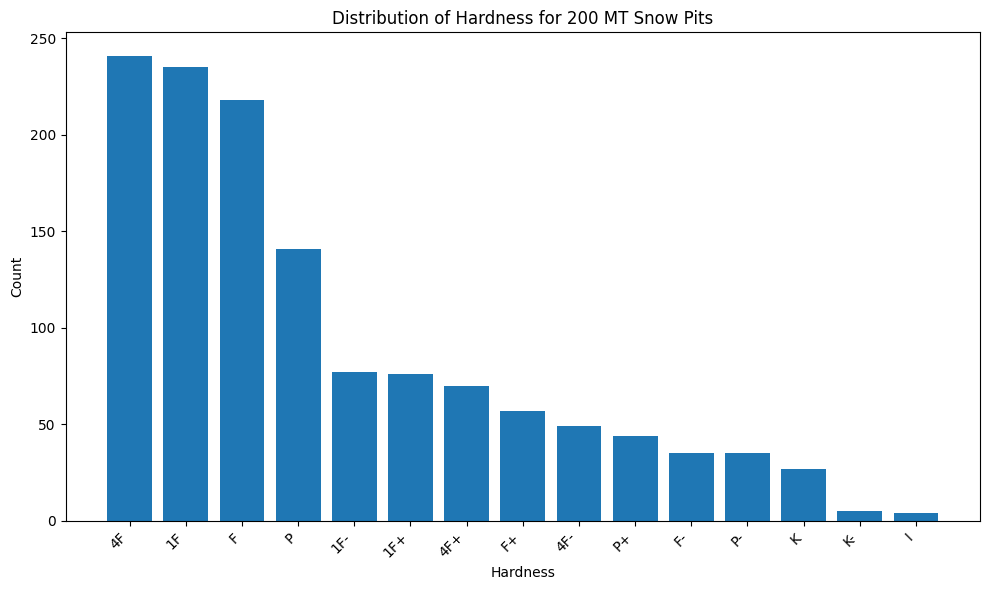

In [32]:
# Create a value counts table for hardness
hardness_table = df['hardness'].value_counts().reset_index()
hardness_table.columns = ['Hardness', 'Count']

# Add percentage column
hardness_table['Percentage'] = (hardness_table['Count'] / hardness_table['Count'].sum() * 100).round(1)

# Display the table
print("\nHardness Distribution:")
print(hardness_table.to_string(index=False))

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(hardness_table['Hardness'], hardness_table['Count'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Hardness for 200 MT Snow Pits')
plt.xlabel('Hardness')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

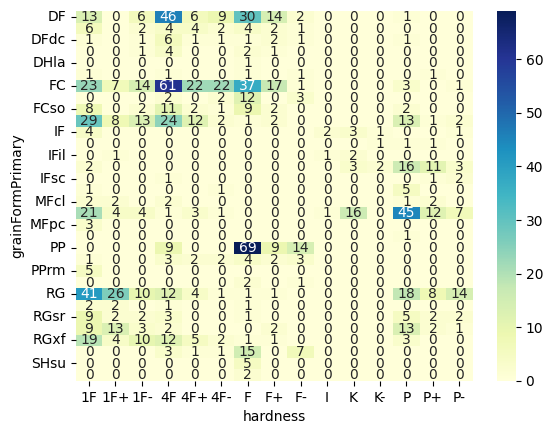

In [36]:
# Create a crosstable
crosstab = pd.crosstab(df['grainFormPrimary'], df['hardness'])

# Create a heatmap  
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")
plt.show()


Primary Grain Form Distribution:
Grain Form  Count  Percentage
        DF     20        14.6
        RG     15        10.9
        FC     14        10.2
      PPgp     12         8.8
      FCxr     11         8.0
        PP     11         8.0
      FCsf      9         6.6
        DH      8         5.8
      RGxf      7         5.1
        SH      4         2.9
      MFcr      4         2.9
      DFdc      3         2.2
      RGsr      3         2.2
      FCso      2         1.5
      DFbk      2         1.5
      PPsd      2         1.5
      IFrc      2         1.5
        MF      2         1.5
      PPpl      1         0.7
      SHcv      1         0.7
      RGwp      1         0.7
      MFcl      1         0.7
      IFbi      1         0.7
      DHla      1         0.7


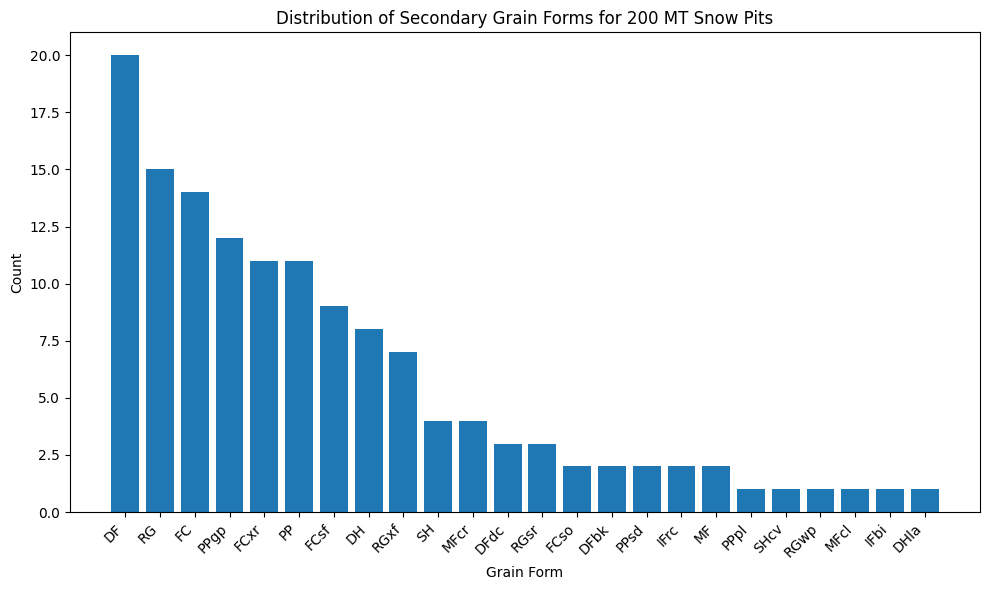

In [41]:
# Create a value counts table for grainFormSecondary
grain_form_table = df['grainFormSecondary'].value_counts().reset_index()
grain_form_table.columns = ['Grain Form', 'Count']

# Add percentage column
grain_form_table['Percentage'] = (grain_form_table['Count'] / grain_form_table['Count'].sum() * 100).round(1)

# Display the table
print("\nPrimary Grain Form Distribution:")
print(grain_form_table.to_string(index=False))

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grain_form_table['Grain Form'], grain_form_table['Count'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Secondary Grain Forms for 200 MT Snow Pits')
plt.xlabel('Grain Form')
plt.ylabel('Count')
plt.tight_layout()
plt.show()